In [ ]:
# .4 האם קיימת קורלציה בין אורך השיר לבין סכום המכירות שלו?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dim_currency= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_currency_rows.csv')
dim_customer= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_customer_rows (1).csv')
dim_employee= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_employee_rows.csv')
dim_playlist= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_playlist_rows.csv')
dim_track= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_track_rows.csv')
fact_invoice= pd.read_csv('/content/drive/MyDrive/final project/db chinook/fact_invoice_rows (1).csv')
fact_invoiceline= pd.read_csv('/content/drive/MyDrive/final project/db chinook/fact_invoiceline_rows.csv')

In [12]:
corr= pd.merge(fact_invoiceline, fact_invoice, on= 'invoiceid')
corr.head()

,invoicelineid,invoiceid,trackid,unitprice,quantity,line_total,last_update_x,customerid,invoicedate,billingaddress,billingcity,billingstate,billingcountry,billingpostalcode,total,last_update_y
0,1,1,2,0.99,1,0.99,2023-01-04 12:05:45.793418+00,2,2018-01-01 00:00:00+00,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98,2023-01-04 12:05:40.330691+00
1,2,1,4,0.99,1,0.99,2023-01-04 12:05:45.796257+00,2,2018-01-01 00:00:00+00,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98,2023-01-04 12:05:40.330691+00
2,3,2,6,0.99,1,0.99,2023-01-04 12:05:45.798589+00,4,2018-01-02 00:00:00+00,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96,2023-01-04 12:05:40.332702+00
3,4,2,8,0.99,1,0.99,2023-01-04 12:05:45.800178+00,4,2018-01-02 00:00:00+00,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96,2023-01-04 12:05:40.332702+00
4,5,2,10,0.99,1,0.99,2023-01-04 12:05:45.801403+00,4,2018-01-02 00:00:00+00,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96,2023-01-04 12:05:40.332702+00


In [14]:
corr= corr.merge(dim_track, on='trackid')

In [16]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13463 entries, 0 to 13462
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   invoicelineid      13463 non-null  int64  
 1   invoiceid          13463 non-null  int64  
 2   trackid            13463 non-null  int64  
 3   unitprice_x        13463 non-null  float64
 4   quantity           13463 non-null  int64  
 5   line_total         13463 non-null  float64
 6   last_update_x      13463 non-null  object 
 7   customerid         13463 non-null  int64  
 8   invoicedate        13463 non-null  object 
 9   billingaddress     13463 non-null  object 
 10  billingcity        13463 non-null  object 
 11  billingstate       1140 non-null   object 
 12  billingcountry     13463 non-null  object 
 13  billingpostalcode  13311 non-null  object 
 14  total              13463 non-null  float64
 15  last_update_y      13463 non-null  object 
 16  track_name         134

In [23]:
corr.head()

,invoicelineid,invoiceid,trackid,unitprice_x,quantity,line_total,last_update_x,customerid,invoicedate,billingaddress,...,unitprice_y,albumid,album_title,artistid,artist_name,genreid,genre_name,mediatypeid,mediatype_name,last_update
0,1,1,2,0.99,1,0.99,2023-01-04 12:05:45.793418+00,2,2018-01-01 00:00:00+00,Theodor-Heuss-Straße 34,...,0.99,2,Balls to the Wall,2,Accept,1,Rock,2,Protected AAC audio file,2023-01-04 12:05:34.384101+00
1,2,1,4,0.99,1,0.99,2023-01-04 12:05:45.796257+00,2,2018-01-01 00:00:00+00,Theodor-Heuss-Straße 34,...,0.99,3,Restless and Wild,2,Accept,1,Rock,2,Protected AAC audio file,2023-01-04 12:05:34.387363+00
2,3,2,6,0.99,1,0.99,2023-01-04 12:05:45.798589+00,4,2018-01-02 00:00:00+00,Ullevålsveien 14,...,0.99,1,For Those About To Rock We Salute You,1,AC/DC,1,Rock,1,MPEG audio file,2023-01-04 12:05:34.390377+00
3,4,2,8,0.99,1,0.99,2023-01-04 12:05:45.800178+00,4,2018-01-02 00:00:00+00,Ullevålsveien 14,...,0.99,1,For Those About To Rock We Salute You,1,AC/DC,1,Rock,1,MPEG audio file,2023-01-04 12:05:34.394371+00
4,5,2,10,0.99,1,0.99,2023-01-04 12:05:45.801403+00,4,2018-01-02 00:00:00+00,Ullevålsveien 14,...,0.99,1,For Those About To Rock We Salute You,1,AC/DC,1,Rock,1,MPEG audio file,2023-01-04 12:05:34.396481+00


In [24]:
df_corr= corr[['unitprice_x','seconds','duracion']]

In [39]:
df_corr

,unitprice_x,seconds,duracion
0,0.99,342,05:42
1,0.99,252,04:12
2,0.99,205,03:25
3,0.99,210,03:30
4,0.99,263,04:23
...,...,...,...
13458,0.99,526,08:46
13459,0.99,266,04:26
13460,0.99,274,04:34
13461,0.99,238,03:58


In [28]:
sum_per_seconds= df_corr.groupby('seconds')['unitprice_x'].sum().reset_index()

In [38]:
sum_per_seconds

,seconds,unitprice_x
0,1,5.94
1,4,3.96
2,6,9.90
3,11,3.96
4,21,0.99
...,...,...
590,2952,1.99
591,2956,1.99
592,2960,1.99
593,5088,1.99


Text(0, 0.5, 'Sales')

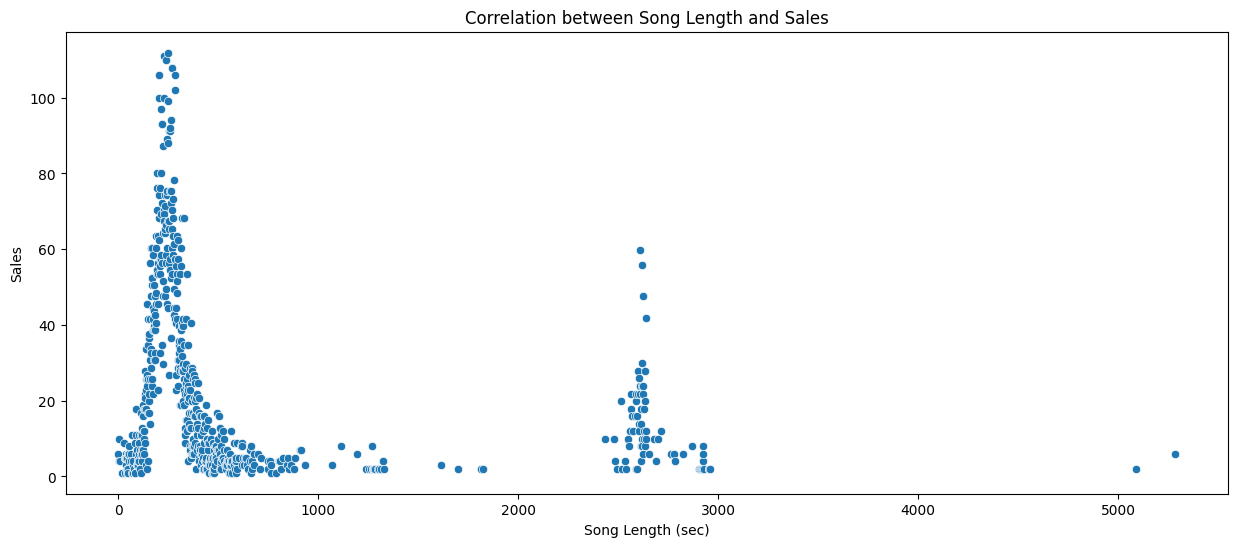

In [32]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='seconds', y='unitprice_x', data= sum_per_seconds )
plt.title('Correlation between Song Length and Sales')
plt.xlabel('Song Length (sec)')
plt.ylabel('Sales')

In [36]:
sum_per_seconds['seconds'].corr(sum_per_seconds['unitprice_x'])
# we can see that the correlation is negative, but relatively close to 0, so there is no unambiguous correlation

-0.2588638644188268

### **In conclusion, there seems to be no significant correlation between song length and sales because there is no clear increase in the graph. We can see that there is an increase followed by a sharp decrease. We can conclude that people apparently like to listen to songs up to 1000 seconds, but this is not conclusive because for songs around 2000 seconds, there is a slight increase again. Therefore, there is no significant correlation. **